<center><img src="./../data/besm.png" alt="In the name of Allah" width="150"></center>

<style>
    
@font-face {font-family: "B Lotus"; src: url("//db.onlinewebfonts.com/t/1605a655ba0a3246ce5eca3eaff6c5c2.eot"); src: url("//db.onlinewebfonts.com/t/1605a655ba0a3246ce5eca3eaff6c5c2.eot?#iefix") format("embedded-opentype"), url("//db.onlinewebfonts.com/t/1605a655ba0a3246ce5eca3eaff6c5c2.woff2") format("woff2"), url("//db.onlinewebfonts.com/t/1605a655ba0a3246ce5eca3eaff6c5c2.woff") format("woff"), url("//db.onlinewebfonts.com/t/1605a655ba0a3246ce5eca3eaff6c5c2.ttf") format("truetype"), url("//db.onlinewebfonts.com/t/1605a655ba0a3246ce5eca3eaff6c5c2.svg#B Lotus") format("svg"); }


</style>

<center style ='font-family: "B Lotus";'>تمرین اول - درس پردازش زبان‌های طبیعی</center>
<center style ='font-family: "B Lotus";'>ترم ۱۴۰۱۱ - دانشکده مهندسی کامپیوتر</center>
<hr>
<center style ='font-family: "B Lotus";'>محمدحسین موثقی‌نیا</center>
<center style ='font-family: "B Lotus";'>۴۰۰۲۰۰۹۱۹</center>
<hr>
<center style ='font-family: "B Lotus";'><h2>تحلیل داده‌های استخراج شده</h2></center>
<hr>

<h2 style='direction:rtl;font-family: "B Lotus";'>§ مقدمه</h2>
<br>
<div style="direction: rtl; font-family: 'B Lotus'; font-size: 115%;">به منظور استخراج دیتاست، ابتدا تمامی فیلم‌های موجود در صفحه اصلی ژانر‌های مختلف سایت فیلیمو استخراج شده است. سپس تمامی کامنت‌های موجود برای هرکدام از فیلم‌ها استخراج شده است. در نهايت با بررسی این کامنت‌ها، فقط کامنت‌هایی به عنوان داده مورد استفاده قرار گرفته است که دارای حداقل یک ایموجی باشند. (هدف این بود که یک مدل self-suprevised مبتنی بر متن و ایموجی همراه آن زده شود تا براساس آن تحلیل احساسات صورت گیرد، اما به دلیل محدودیت زمانی تسک زیر انجام شد.)</div>
<br>
<div style="direction: rtl; font-family: 'B Lotus'; font-size: 115%;">در نتیجه توضیحات کلی دیتاست عبارت است از:</div>
<ul style="direction: rtl; font-family: 'B Lotus'; font-size: 115%;">
    <li>توضیح: کامنت‌های فیلم‌های سایت فیلیمو</li>
    <li>حجم دیتاست: 8k کامنت دارای ایموجی (17 مگابایت - البته حجم زیادی از این مجموعه در ادامه هرس می‌شود)</li>
    <li>زبان دیتاست: فارسی</li>
</ul>
<br>
<div style="direction: rtl; font-family: 'B Lotus'; font-size: 115%;">در انتها با استفاده از یک مدل fine-tune شده بر روی زبان فارسی به منظور تحلیل احساسات، استفاده شده است تا مبتنی بر کامنت های هر فیلم احساسات را برآوورد کند و یک امتیاز دهی برای آن فیلم ارائه کند. همچنین برای ژانرهای مختلف نیز این عمل را تکرار کردیم و میزان محبوبیت ژانرهای مختلف را نیز اندازه‌گیری کردیم.</div>
<hr>

<h2 style='direction:rtl;font-family: "B Lotus";'>§ پیش‌پردازش‌های اولیه</h2>

<div style="direction:rtl; font-family: 'B Lotus';  font-size:115%;">نصب و فراخوانی کتابخانه‌های مورد نیاز:</div>

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install tqdm
!pip install hazm
!pip install wordcloud_fa
!pip install nltk
!pip install matplotlib
!pip install yake

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from tqdm import tqdm
from wordcloud_fa import WordCloudFa
from __future__ import unicode_literals
import hazm
import random
import codecs
from nltk import FreqDist
import nltk
import itertools
import copy

<div style="direction:rtl; font-family: 'B Lotus';  font-size:115%;">زمانی که از <code>google-colab</code> استفاده می‌شود باید دو مورد زیر اضافه شود:</div>

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# os.chdir('/content/drive/MyDrive/NLP/hw1/nlp/hw1/code/')

<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">تعریف الفباهای مورد نیاز، شامل موارد:</div>
<ul style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">
  <li>الفبای زبان فارسی</li>
  <li>علائم سجاوندی</li>
  <li>اعداد فارسی و انگلیسی</li>
  <li>لیست ایموجی&zwnj;ها &laquo;از این <a href="https://unicode.org/Public/emoji/15.0/" rel="noopener noreferrer" target="_blank">لینک</a> استفاده شده است&raquo;</li>
</ul> 

In [2]:
persian_alphabet = ["آ","ا","أ","ئ","ب","پ","ت","ث","ج","چ","ح","خ","د","ذ","ر","ز","ژ","س","ش","ص","ض","ط","ظ","ع","غ","ف","ق","ک","گ","ل","م","ن","و","ه","ی"]
decorative_signs = [" ", ",", ":", "؛", "|", "\\", "*", "\u200C", "٬", "!", "؟", "?", "(", ")", ".", "،", "%", "٪", "ـ", "-", "+", "=", "`", "~", "ء", "ٔ", "ٓ", "«", "»", "ة", "]", "[", "ة", "{", "}"]
english_alphabet = [chr(i) for i in range(ord('A'), ord('Z')+1)]
english_alphabet.extend([chr(i) for i in range(ord('a'), ord('z')+1)])
persian_numbers = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"] 
english_numbers = ["۰", "۱", "۲", "۳", "۴", "۵", "۶", "۷", "۸", "۹"]

<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">ایموجی&zwnj;ها به صورت کلی دارای دو دسته هستند: ایموجی&zwnj;های تک unicode ای و ایموجی&zwnj;های چند unicode ای.</div>

In [3]:
emoji_df = pd.read_csv('./../data/emoji_df.csv')

emoji_df_single = pd.DataFrame(columns=["emoji","name","group","sub_group","codepoints"])
emoji_df_multiple = pd.DataFrame(columns=["emoji","name","group","sub_group","codepoints"])

j = 0
k = 0
for i, code in enumerate(emoji_df['codepoints']):
    if len(code.split()) > 1:
        emoji_df_multiple.loc[j] = emoji_df.loc[i]
        j += 1
    else:
        emoji_df_single.loc[k] = emoji_df.loc[i]
        k += 1

emoji_df

,emoji,name,group,sub_group,codepoints
0,😀,grinning face,Smileys & Emotion,face-smiling,1F600
1,😃,grinning face with big eyes,Smileys & Emotion,face-smiling,1F603
2,😄,grinning face with smiling eyes,Smileys & Emotion,face-smiling,1F604
3,😁,beaming face with smiling eyes,Smileys & Emotion,face-smiling,1F601
4,😆,grinning squinting face,Smileys & Emotion,face-smiling,1F606
...,...,...,...,...,...
4576,🇿🇲,flag: Zambia,Flags,country-flag,1F1FF 1F1F2
4577,🇿🇼,flag: Zimbabwe,Flags,country-flag,1F1FF 1F1FC
4578,🏴󠁧󠁢󠁥󠁮󠁧󠁿,flag: England,Flags,subdivision-flag,1F3F4 E0067 E0062 E0065 E006E E0067 E007F
4579,🏴󠁧󠁢󠁳󠁣󠁴󠁿,flag: Scotland,Flags,subdivision-flag,1F3F4 E0067 E0062 E0073 E0063 E0074 E007F


<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">مجموعه ایموجی&zwnj;های تک unicode ای عبارت اند از:</div>

In [4]:
emoji_group_counts = emoji_df_single['group'].value_counts()
for c in emoji_group_counts.keys():
    print(f"{c}:{list(emoji_df_single[emoji_df_single['group'] == c]['emoji'])}")

Objects:['👓', '🕶', '🥽', '🥼', '🦺', '👔', '👕', '👖', '🧣', '🧤', '🧥', '🧦', '👗', '👘', '🥻', '🩱', '🩲', '🩳', '👙', '👚', '👛', '👜', '👝', '🛍', '🎒', '🩴', '👞', '👟', '🥾', '🥿', '👠', '👡', '🩰', '👢', '👑', '👒', '🎩', '🎓', '🧢', '🪖', '⛑', '📿', '💄', '💍', '💎', '🔇', '🔈', '🔉', '🔊', '📢', '📣', '📯', '🔔', '🔕', '🎼', '🎵', '🎶', '🎙', '🎚', '🎛', '🎤', '🎧', '📻', '🎷', '🪗', '🎸', '🎹', '🎺', '🎻', '🪕', '🥁', '🪘', '📱', '📲', '☎', '📞', '📟', '📠', '🔋', '🔌', '💻', '🖥', '🖨', '⌨', '🖱', '🖲', '💽', '💾', '💿', '📀', '🧮', '🎥', '🎞', '📽', '🎬', '📺', '📷', '📸', '📹', '📼', '🔍', '🔎', '🕯', '💡', '🔦', '🏮', '🪔', '📔', '📕', '📖', '📗', '📘', '📙', '📚', '📓', '📒', '📃', '📜', '📄', '📰', '🗞', '📑', '🔖', '🏷', '💰', '🪙', '💴', '💵', '💶', '💷', '💸', '💳', '🧾', '💹', '✉', '📧', '📨', '📩', '📤', '📥', '📦', '📫', '📪', '📬', '📭', '📮', '🗳', '✏', '✒', '🖋', '🖊', '🖌', '🖍', '📝', '💼', '📁', '📂', '🗂', '📅', '📆', '🗒', '🗓', '📇', '📈', '📉', '📊', '📋', '📌', '📍', '📎', '🖇', '📏', '📐', '✂', '🗃', '🗄', '🗑', '🔒', '🔓', '🔏', '🔐', '🔑', '🗝', '🔨', '🪓', '⛏', '⚒', '🛠', '🗡', '⚔', '🔫', '🪃', '🏹', '🛡', '🪚', '🔧', '🪛', '🔩', '

<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">مجموعه ایموجی&zwnj;های چند unicode ای عبارت اند از:</div>

In [5]:
emoji_group_counts = emoji_df_multiple['group'].value_counts()
for c in emoji_group_counts.keys():
    print(f"{c}:{list(emoji_df_multiple[emoji_df_multiple['group'] == c]['emoji'])}")
    print('=======')

People & Body:['👋🏻', '👋🏼', '👋🏽', '👋🏾', '👋🏿', '🤚🏻', '🤚🏼', '🤚🏽', '🤚🏾', '🤚🏿', '🖐️', '🖐🏻', '🖐🏼', '🖐🏽', '🖐🏾', '🖐🏿', '✋🏻', '✋🏼', '✋🏽', '✋🏾', '✋🏿', '🖖🏻', '🖖🏼', '🖖🏽', '🖖🏾', '🖖🏿', '👌🏻', '👌🏼', '👌🏽', '👌🏾', '👌🏿', '🤌🏻', '🤌🏼', '🤌🏽', '🤌🏾', '🤌🏿', '🤏🏻', '🤏🏼', '🤏🏽', '🤏🏾', '🤏🏿', '✌️', '✌🏻', '✌🏼', '✌🏽', '✌🏾', '✌🏿', '🤞🏻', '🤞🏼', '🤞🏽', '🤞🏾', '🤞🏿', '🤟🏻', '🤟🏼', '🤟🏽', '🤟🏾', '🤟🏿', '🤘🏻', '🤘🏼', '🤘🏽', '🤘🏾', '🤘🏿', '🤙🏻', '🤙🏼', '🤙🏽', '🤙🏾', '🤙🏿', '👈🏻', '👈🏼', '👈🏽', '👈🏾', '👈🏿', '👉🏻', '👉🏼', '👉🏽', '👉🏾', '👉🏿', '👆🏻', '👆🏼', '👆🏽', '👆🏾', '👆🏿', '🖕🏻', '🖕🏼', '🖕🏽', '🖕🏾', '🖕🏿', '👇🏻', '👇🏼', '👇🏽', '👇🏾', '👇🏿', '☝️', '☝🏻', '☝🏼', '☝🏽', '☝🏾', '☝🏿', '👍🏻', '👍🏼', '👍🏽', '👍🏾', '👍🏿', '👎🏻', '👎🏼', '👎🏽', '👎🏾', '👎🏿', '✊🏻', '✊🏼', '✊🏽', '✊🏾', '✊🏿', '👊🏻', '👊🏼', '👊🏽', '👊🏾', '👊🏿', '🤛🏻', '🤛🏼', '🤛🏽', '🤛🏾', '🤛🏿', '🤜🏻', '🤜🏼', '🤜🏽', '🤜🏾', '🤜🏿', '👏🏻', '👏🏼', '👏🏽', '👏🏾', '👏🏿', '🙌🏻', '🙌🏼', '🙌🏽', '🙌🏾', '🙌🏿', '👐🏻', '👐🏼', '👐🏽', '👐🏾', '👐🏿', '🤲🏻', '🤲🏼', '🤲🏽', '🤲🏾', '🤲🏿', '🙏🏻', '🙏🏼', '🙏🏽', '🙏🏾', '🙏🏿', '✍️', '✍🏻', '✍🏼', '✍🏽', '✍🏾', '✍🏿', '💅🏻', '💅🏼', '💅🏽', '💅🏾', '💅🏿', '

<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">با توجه به این که ایموجی&zwnj;هایی که بار معنایی مناسبی دارند (مناسب تحلیل احساسات هستند)، اکثرا از دسته تک unicode ها و زیرمجموعه&zwnj;های زیر هستند، فقط همین زیرمجموعه‌ها را به عنوان مجموعه ایموجی&zwnj;ها در نظر می&zwnj;گیریم.</div>
<ul style="direction:rtl; font-family: 'B Lotus'; font-size:115%">
<li>People &amp; Body</li>
<li>Smileys &amp; Emotion</li>
<li>Symbols</li>
<li>Travel &amp; Places</li>
</ul>


In [6]:
selected_group_df = ['People & Body', 'Smileys & Emotion', 'Symbols', 'Travel & Places']
emoji_selected_df = pd.DataFrame()
for group in selected_group_df:
    emoji_selected_df = pd.concat([emoji_selected_df, 
                                   emoji_df_single[emoji_df_single['group'] == group]], 
                                  ignore_index=True)

emoji_selected_df

,emoji,name,group,sub_group,codepoints
0,👋,waving hand,People & Body,hand-fingers-open,1F44B
1,🤚,raised back of hand,People & Body,hand-fingers-open,1F91A
2,🖐,hand with fingers splayed,People & Body,hand-fingers-open,1F590
3,✋,raised hand,People & Body,hand-fingers-open,270B
4,🖖,vulcan salute,People & Body,hand-fingers-open,1F596
...,...,...,...,...,...
710,⛄,snowman without snow,Travel & Places,sky & weather,26C4
711,☄,comet,Travel & Places,sky & weather,2604
712,🔥,fire,Travel & Places,sky & weather,1F525
713,💧,droplet,Travel & Places,sky & weather,1F4A7


In [7]:
emoji_alphabet_single = list(emoji_df_single['emoji'])
emoji_alphabet_multiple = list(emoji_df_multiple['emoji'])
emoji_alphabet = list(emoji_df['emoji'])
print('# Selected emoji list: \t\t\t\t', len(emoji_selected_df))
print('# Single Unicode Alphabet emoji list: \t\t', len(emoji_alphabet_single))
print('# Multiple Unicode Alphabet emoji list: \t', len(emoji_alphabet_multiple))
print('# All emoji list: \t\t\t\t', len(emoji_alphabet))

# Selected emoji list: 				 715
# Single Unicode Alphabet emoji list: 		 1320
# Multiple Unicode Alphabet emoji list: 	 3261
# All emoji list: 				 4581


<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">زیرمجموعه انتخاب شده به عنوان الفبای ایموجی مورد نظر انتخاب می‌شود:</div>

In [8]:
emoji_alphabet = list(emoji_selected_df['emoji'])

<div style="direction:rtl; font-family: 'B Lotus';  font-size:115%;">در این مرحله یک پیش&zwnj;پردازش اولیه انجام می&zwnj;شود:</div>
<ul style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">
  <li>حذف <code>n\</code> های اضافه متن که منجر به اضافه شدن خطوط شده است</li>
  <li>حذف مواردی که به دلیل اشتباه تایپی یا ... tab زده شده است و به دلیل این که در فایل به عنوان delimiter از tab استفاده شده است، این موارد را با یک tab جایگزین می کنیم.</li>
</ul> 

In [10]:
def check_file_and_extract_data(num):
    f = open(f'./../result/comments_{num}.txt', 'r')
    text = f.readlines()
    f.close()

    text = [x.replace('\n', '').replace('\t\t', '\t').split('\t') for x in text]

    i = 0
    while i < len(text):
        if len(text[i]) == 2:
            i += 1
            text[i-1].append(text[i])
            text[i] = []
        i += 1

    while [] in text:
        text.remove([])
    
    for i, x in enumerate(text):
        if len(x) != 3 and x != []:
            print(f'ERROR [{i}]')
    return text

In [126]:
data = []
for i in range(1,4):
    data.extend(check_file_and_extract_data(i))

print(f'Comments number: {len(data)}')

Comments number: 708934


<div style="direction:rtl; font-family: 'B Lotus';  font-size:115%;">تابع <code>get_comments_with_emoji</code> لیستی از کامنت&zwnj;ها را دریافت می کند و در خروجی کامنت&zwnj;هایی را بر می&zwnj;گرداند که حتما دارای حداقل یک <strong>ایموجی</strong> باشند.</div>
<div style="direction:rtl; font-family: 'B Lotus';  font-size:115%;">برای این منظور، بررسی می&zwnj;کند که آیا هرکدام از الفبای ایموجی موجود حداقل یکبار در متن وجود داشته است یا خیر. در صورت وجود آن را به لیست اضافه می کند.</div>

In [9]:
def get_comments_with_emoji(data):
    comments = []
    s1 = set(emoji_alphabet_multiple)
    
    for d in tqdm(data):
        if type(d[2]) == str:
            for e in emoji_alphabet:
                if e in d[2]:
                    comments.append(d)
                    break
    return comments

<div style="direction:rtl; font-family: 'B Lotus';  font-size:115%;">مثال:</div>

In [10]:
get_comments_with_emoji([['drama', 'title', 'Hello 👍🏻'], ['drama', 'title', 'hi 👍🏻😒']])

100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 8924.05it/s]


[['drama', 'title', 'Hello 👍🏻'], ['drama', 'title', 'hi 👍🏻😒']]

<div style="direction:rtl; font-family: 'B Lotus';  font-size:115%;">به کمک تابع <code>get_comments_with_emoji</code> کامنت هایی که دارای ایموجی هستند را استخراج می‌کنیم و در نهایت در فایل <code>comments_with_emoji.txt</code> ذخیره می کنیم. </div>

In [132]:
# comments_with_emoji = get_comments_with_emoji(data)

# f = open("./../result/comments_with_emoji.txt", "w")
# for comment in comments_with_emoji:
#     f.write(f"{comment[0]}\t{comment[1]}\t{comment[2]}\n")
# f.close()

# len(comments_with_emoji)

100%|████████████████████████████████████████████████████████████████████████| 708934/708934 [00:10<00:00, 66047.71it/s]


88761

<div style="direction:rtl; font-family: 'B Lotus';  font-size:115%;">با توجه به این که پروسه استخراج کامنت‌های دارای ایموجی، کمی طولانی است، خروجی در فایل <code>comments_with_emoji.txt</code> ذخیره شده و هر موقع نیاز باشد، بازخوانی می‌شود. </div>

In [11]:
comments_with_emoji = []

f = open("./../result/comments_with_emoji.txt", "r")
comments_with_emoji = f.readlines()
f.close()

comments_with_emoji = [row.replace('\n', '').split('\t') for row in comments_with_emoji]

comments_df = pd.DataFrame(comments_with_emoji, columns=['genre', 'title', 'comment'])
comments_df

,genre,title,comment
0,drama,فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...,توی ۸ ساعت مهلت فیلم ۲ بار این فیلم بی نظیر را...
1,drama,فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...,ارزش دیدن داره👌
2,drama,فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...,پسندیدم 👍
3,drama,فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...,عااااااااالی بود . با بازی آقای درخشانی عزیز ...
4,drama,فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...,خیلی خوب بود👌👌
...,...,...,...
88756,theatre,فیلم در انتظار آدولف|دانلود و تماشای آنلاین با...,واقعا دلم سوخت که چرا اون سال این تئاتر زیبا ر...
88757,theatre,فیلم در انتظار آدولف|دانلود و تماشای آنلاین با...,واقعا عالی بود، جذاب و بی نظیر 👍
88758,theatre,فیلم در انتظار آدولف|دانلود و تماشای آنلاین با...,😍😍😍
88759,theatre,فیلم شهر بدون آسمان|دانلود و تماشای آنلاین با ...,عالی 😍😍 با بازی بی نظیر و مرکعه پانته آ پناهی ...


<div style="direction:rtl; font-family: 'B Lotus';  font-size:115%;">این تابع به منظور استخراج مقادیری از دیکشنری ورودی است که بزرگتر از مقدار <code>value</code> باشند.</div>

In [12]:
def get_gt_value(my_dict, value):
    '''
    Get values from dictionary that grater than "value"
    '''
    return {x:y for x,y in my_dict.items() if y>value}

<div style="direction:rtl; font-family: 'B Lotus';  font-size:115%;">تابع نمایش چند مورد اول لیست</div>

In [13]:
def head_list(lst, until=5, sep=' '):
    '''
    Print top "until" item of list, "sep" is the seperator of printing results
    '''
    result = ''
    num = 0
    for i in lst:
        if num == until:
            result += f'{i}'
        else:
            result += f'{i}{sep}'
        num += 1
        if num > until:
            break
    print(result)

<div style="direction:rtl; font-family: 'B Lotus';  font-size:115%;">یک دیکشنری از ایموجی ها ساخته و تعداد هرکدام را در آن ذخیره می‌کنیم و در نهایت یک مرتب سازی براساس تعداد انجام می دهیم.</div>
<div style="direction:rtl; font-family: 'B Lotus';  font-size:115%;">در زمان شمارش، برای هر خط درصورتی که چندبار از یک ایموجی استفاده شده باشد، آن ایموجی فقط یکبار در شمارش به حساب خواهد آمد.</div>

In [14]:
emoji_dict = {}

for emoji in emoji_alphabet:
    emoji_dict[emoji] = 0

for comment in tqdm(comments_df['comment']):
    tmp_lst = []
    for s in comment:
        if s in emoji_alphabet:
            tmp_lst.append(s)
    for e in list(dict.fromkeys(tmp_lst)):
        emoji_dict[e] += 1

emoji_dict = {k: v for k, v in sorted(emoji_dict.items(), key=lambda item: item[1], reverse=True)}
emoji_dict_nonzero = get_gt_value(emoji_dict, 0)

100%|███████████████████████████████████████████████████████████████████████████| 88761/88761 [00:13<00:00, 6366.55it/s]


In [15]:
top_num_to_show = 20

print(f'Top {top_num_to_show} emojis in texts:\n #\tEmoji\tNumber')

i = 0
for k in emoji_dict.keys():
    print(f'{i:2d}\t{k}\t{emoji_dict[k]}')
    i += 1
    if i >= 20:
        break

print('---------------------')
print(f"The percentage of emojis in the text compared to the total emojis: \
[{int(len(emoji_dict_nonzero)/len(emoji_dict)*10000)/100}%]")

Top 20 emojis in texts:
 #	Emoji	Number
 0	😍	17335
 1	❤	14646
 2	👌	12692
 3	👍	9942
 4	😂	6895
 5	😘	4838
 6	👏	4400
 7	🤩	3413
 8	🤣	3017
 9	🥰	2950
10	😭	2334
11	😊	2122
12	🙏	2095
13	💜	1872
14	💙	1769
15	😁	1599
16	💖	1547
17	🥺	1436
18	😅	1119
19	😐	1118
---------------------
The percentage of emojis in the text compared to the total emojis: [63.07%]


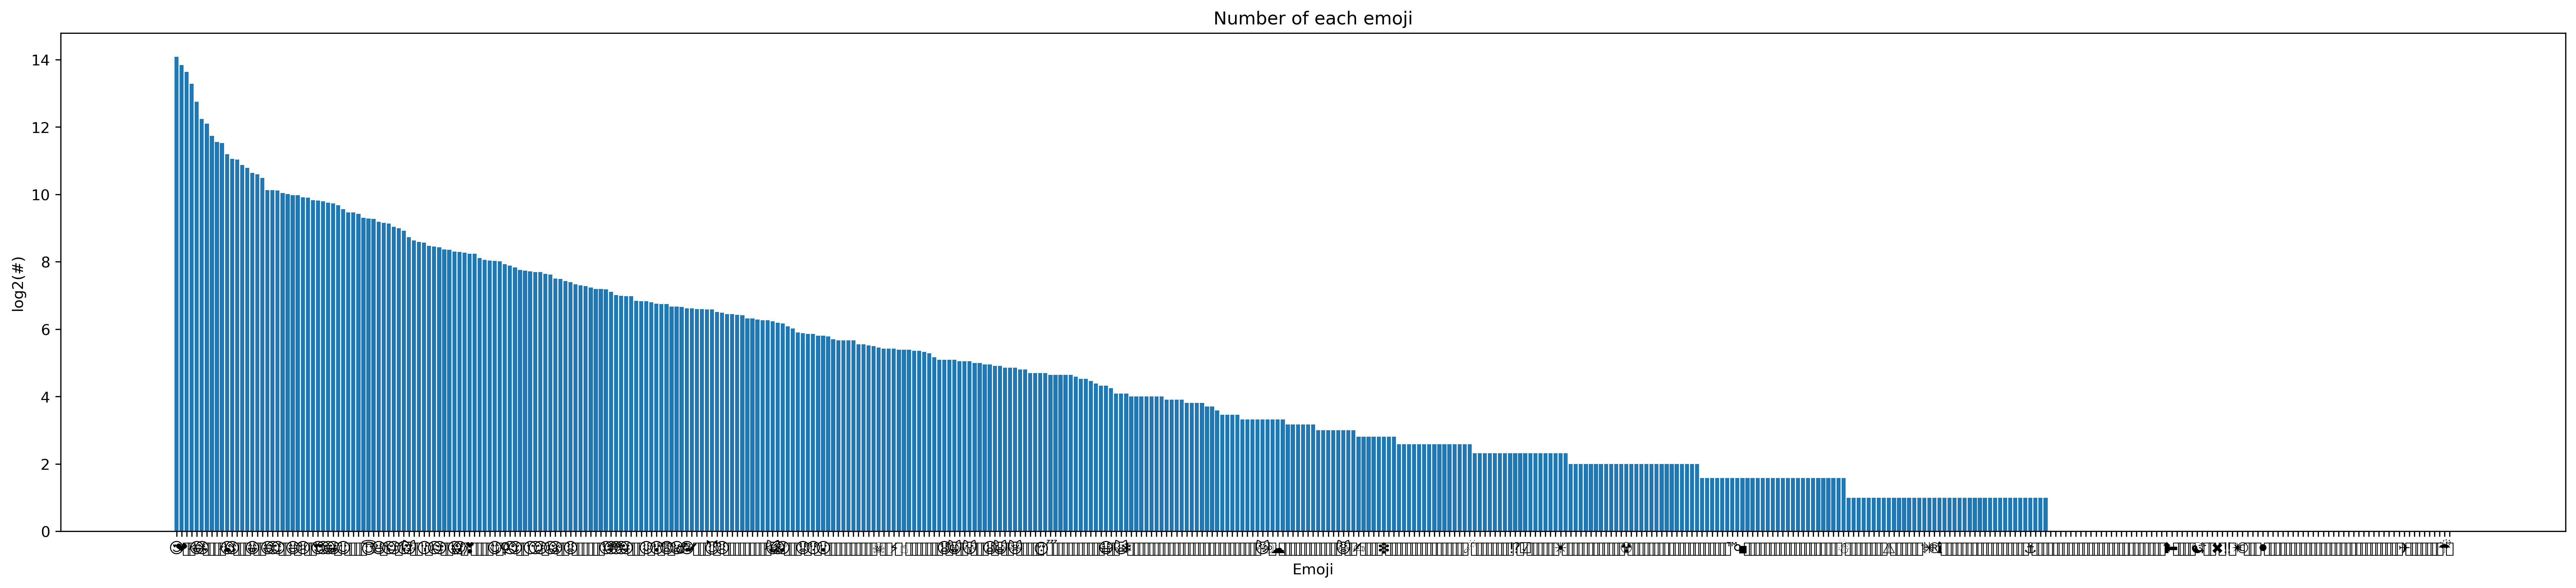

In [17]:
data_to_show = get_gt_value(emoji_dict, 0)

figure(figsize=(30, 6), dpi=300)

plt.bar(range(len(data_to_show)), np.log2(list(data_to_show.values())), align='center')
plt.xticks(range(len(data_to_show)), list(data_to_show.keys()))
plt.xlabel("Emoji")
plt.ylabel("log2(#)")
plt.title("Number of each emoji")
plt.show()

<h2 style='direction:rtl;font-family: "B Lotus";'>§ نرمال‌سازی</h2>

<div style='direction:rtl;font-family: "B Lotus";'>یک کلاس مجزا تعریف شده است که از کلاس <code>Normalizer</code> کتابخانه <code>hazm</code> ارث بری می&zwnj;کند. در این کلاس توابع زیر اضافه شده&zwnj;اند:</div>
<ul style='direction:rtl;font-family: "B Lotus";'>
  <li>تابع <code>__init__</code> صرفا به این منظور بازنویسی شده است که تابع <code>aug_data_init</code> را صدا بزند تا محتوای فایل مورد نیاز در متغیرها ذخیره شود. همچنین الفباهای مورد نیاز را مقدار دهی می کند.</li>
  <li>تابع <code>aug_data_init</code> فایلی را می&zwnj;خواند و در یک دیکشنری ذخیره می&zwnj;کند. این فایل غلط های متداولی که در متن وجود داشته است را در خود دارد و شکل صحیح آن را نوشته است و دیکشنری ساخته شده برهمین اساس می&zwnj;باشد.</li>
    <li>تابع <code>add_space_between_emoji_and_text</code> به منظور ایجاد فاصله میان متن و ایموجی‌ها می‌باشد.</li>
    <li>تابع <code>convert_to_basic_emoji</code> برخی از ایموجی‌ها که رنگ‌های مخلتف یا ساختارهای مختلف مبتنی بر یک پایه هستند را به حالت پایه تبدیل می‌کند</li>
    <li>تابع <code>normalize_emoji</code> به هر ایموجی فقط یکبار اجازه حضور در متن را می دهد و ایموجی‌های تکرار را حذف می‌کند.</li>
    <li>تابع <code>replace_with_persian</code> برخی از کاراکترهایی که مشابه فارسی هستند ولی در الفبای فارسی نیستند را به مشابه فارسی آن‌ها تبدیل می‌کند.</li>
    <li>تابع <code>my_normalizer</code> به ترتیب موارد زیر را انجام می دهد:
<ol>
  <li>اصلاح بعضی از کاراکتر&zwnj;های غیر فارسی (با استفاده از تابع <code>replace_with_persian</code>)</li>
  <li>بین ایموجی&zwnj;ها و متن فاصله می&zwnj;گذارد (با استفاده از تابع <code>add_space_between_emoji_and_text</code>)</li>
  <li>ایموجی&zwnj;های تکراری را حذف می&zwnj;کند (با استفاده از تابع <code>normalize_emoji</code>)</li>
    <li>نرمال&zwnj;سازی تابع <code>normalize</code> مربوط به کتابخانه <code>hazm</code> را انجام می&zwnj;دهد&nbsp;</li>
  <li>ایموجی&zwnj;هایی که از چندکاراکتر ساخته شده اند را به حالت پایه خود بر می&zwnj;گرداند (با استفاده از تابع <code>convert_to_basic_emoji</code>)</li>
  <li>در نهایت یک پاکسازی کلی روی متن انجام می&zwnj;دهد و بعضی از کاراکترهای تکراری یا اشتباه را اصلاح می&zwnj;کند. (لیست اصلاحات با استفاده از فایل <code>data/augmented_data.txt/../.</code> می&zwnj;باشد.)</li>
</ol></li>
    
</ul>

In [18]:
class MyNormalizer(hazm.Normalizer):
    
    def __init__(self, persian_alphabet, english_alphabet, decorative_signs, 
                 persian_numbers, english_numbers, emoji_alphabet):
        super().__init__()
        self.aug_data_init()
        self.persian_alphabet = persian_alphabet
        self.decorative_signs = decorative_signs
        self.english_alphabet = english_alphabet
        self.persian_numbers = persian_numbers
        self.english_numbers = english_numbers
        self.emoji_alphabet = emoji_alphabet
        
    def aug_data_init(self):
        f = open('./../data/augmented_data.txt', 'r')
        self.aug_data = f.readlines()
        f.close()
    
    def add_space_between_emoji_and_text(self, sent):
        res_sent = ''
        for i in range(len(sent)):
            if i+1 < len(sent):
                if (sent[i] in self.emoji_alphabet and sent[i+1] != ' ') or \
                    (sent[i] != ' ' and sent[i+1] in self.emoji_alphabet):
                    res_sent += sent[i] + ' '
                else:
                    res_sent += sent[i]
            else:
                res_sent += sent[i]
        return res_sent
    
    
    def convert_to_basic_emoji(self, sent):
        res_sent = ''
        for c in sent:
            if c in self.persian_alphabet or \
            c in self.decorative_signs or \
            c in self.english_alphabet or \
            c in self.persian_numbers or \
            c in self.english_numbers or \
            c in self.emoji_alphabet :
                res_sent += c
        return res_sent
    
    
    def normalize_emoji(self, text):
        res_text = ''
        for t in text:
            if t in self.emoji_alphabet and not t in res_text:
                res_text += t
            elif not t in self.emoji_alphabet:
                res_text += t
        return res_text
    
    
    def replace_with_persian(self, sent):
        replace_list = {'ى':'ی',
                        'ة':'ه',
                        'ي':'ی'}
        
        for x in replace_list:
            sent = sent.replace(x, replace_list[x])
        
        return sent
    
    
    def my_normalizer(self, text):
        text = self.replace_with_persian(text)
        text = self.add_space_between_emoji_and_text(text)
        text = self.normalize_emoji(text)
        text = self.normalize(text)
        text = self.convert_to_basic_emoji(text)
        
        
        aug = {y[0]:y[1] for y in [x.replace('\n', '').split('\t') for x in self.aug_data]}

        for k in aug:
            while k in text:
                text = text.replace(k, aug[k])
        return text

In [19]:
normalizer = MyNormalizer(persian_alphabet, 
                          english_alphabet, 
                          decorative_signs, 
                          persian_numbers, 
                          english_numbers, 
                          emoji_alphabet
                          )

<div style="direction:rtl; font-family: 'B Lotus';  font-size:115%;">مثال:</div>

In [20]:
test_set = ["واقعااااا", "عاااالییییی", "عالیهههه", 'خداروششششکر', 'دم سازندش گرم😊', 'وانیامم🥳🥳👏', 'فوق العاده']
for i, t in enumerate(test_set):
    print(f'{i+1}\tBefore: {t}\t\tAfter: {normalizer.my_normalizer(t)}')

1	Before: واقعااااا		After: واقعا
2	Before: عاااالییییی		After: عالی
3	Before: عالیهههه		After: عالیه
4	Before: خداروششششکر		After: خداروشکر
5	Before: دم سازندش گرم😊		After: دم سازندش گرم 😊
6	Before: وانیامم🥳🥳👏		After: وانیامم 🥳 👏
7	Before: فوق العاده		After: فوق العاده


<div style='direction:rtl;font-family: "B Lotus";'>پیش پردازش اولیه متن:</div>
<ul style='direction:rtl;font-family: "B Lotus";'>
  <li>حذف <code>n\</code> ها</li>
  <li>حذف <code>space</code> های اضافه ابتدا و انتهای متن</li>
  <li>شکستن متن از نقاط دارای <code>space</code></li>
  <li>فقط کامنت‌های انتخاب می‌شوند که حتما متن فارسی نیز داشته باشند</li>
</ul>  

In [21]:
comments = []
for row in tqdm(comments_with_emoji):
    for c in persian_alphabet:
        if c in row[2]:
            comments.append([row[0], row[1], row[2].replace("&#039;", "\'").replace('\n', '').strip().split()])
            break

comments_df = pd.DataFrame(comments, columns=['genre', 'title', 'comment'])
comments_df

100%|█████████████████████████████████████████████████████████████████████████| 88761/88761 [00:00<00:00, 396835.28it/s]


,genre,title,comment
0,drama,فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...,"[توی, ۸, ساعت, مهلت, فیلم, ۲, بار, این, فیلم, ..."
1,drama,فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...,"[ارزش, دیدن, داره👌]"
2,drama,فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...,"[پسندیدم, 👍]"
3,drama,فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...,"[عااااااااالی, بود, ., با, بازی, آقای, درخشانی..."
4,drama,فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...,"[خیلی, خوب, بود👌👌]"
...,...,...,...
84315,theatre,فیلم در انتظار آدولف|دانلود و تماشای آنلاین با...,"[عالی, و, بی‌نقص, 👌🏿💙]"
84316,theatre,فیلم در انتظار آدولف|دانلود و تماشای آنلاین با...,"[واقعا, دلم, سوخت, که, چرا, اون, سال, این, تئا..."
84317,theatre,فیلم در انتظار آدولف|دانلود و تماشای آنلاین با...,"[واقعا, عالی, بود،, جذاب, و, بی, نظیر, 👍]"
84318,theatre,فیلم شهر بدون آسمان|دانلود و تماشای آنلاین با ...,"[عالی, 😍😍, با, بازی, بی, نظیر, و, مرکعه, پانته..."


<div style='direction: rtl; font-family: "B Lotus"; font-size: 115%;'>نرمال‌سازی به کمک تابع <code>my_normalizer</code> انجام می‌شود:</div>

In [22]:
comments_normalized = {}
comments_normalized['genre'] = comments_df['genre']
comments_normalized['title'] = comments_df['title']
comments_normalized['comment'] = [[normalizer.my_normalizer(y) for y in x] for x in tqdm(comments_df['comment'])]
comments_normalized = pd.DataFrame(comments_normalized)
comments_normalized

100%|███████████████████████████████████████████████████████████████████████████| 84320/84320 [00:58<00:00, 1442.20it/s]


,genre,title,comment
0,drama,فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...,"[توی, ۸, ساعت, مهلت, فیلم, ۲, بار, این, فیلم, ..."
1,drama,فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...,"[ارزش, دیدن, داره 👌]"
2,drama,فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...,"[پسندیدم, 👍]"
3,drama,فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...,"[عالی, بود, ., با, بازی, آقای, درخشانی, عزیز, ..."
4,drama,فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...,"[خیلی, خوب, بود 👌 ]"
...,...,...,...
84315,theatre,فیلم در انتظار آدولف|دانلود و تماشای آنلاین با...,"[عالی, و, بی‌نقص, 👌 💙]"
84316,theatre,فیلم در انتظار آدولف|دانلود و تماشای آنلاین با...,"[واقعا, دلم, سوخت, که, چرا, اون, سال, این, تئا..."
84317,theatre,فیلم در انتظار آدولف|دانلود و تماشای آنلاین با...,"[واقعا, عالی, بود،, جذاب, و, بی, نظیر, 👍]"
84318,theatre,فیلم شهر بدون آسمان|دانلود و تماشای آنلاین با ...,"[عالی, 😍 , با, بازی, بی, نظیر, و, مرکعه, پانته..."


In [23]:
for x in random.sample(list(comments_normalized['comment']), 30):
    print(' '.join(x))

خداییش خیلی خوب و تاثیر گزار بود ❤ 
فیلم با ارزشی است ❤     ❤    
بچه ها کریس نمرد آخر فیلم اون کسی که تار بود اون کریس بود دیگه 🙄 😐
این کارتون خیلی زیبا بود ❤  👏 👌 
عالی بود بهترین فیلم ژاپنی بود که دیدم ❤ 
بسیارزیبا 💕 💗 😻
خیلی چندش بود 😐 ولی خوب بود 😐
قرار بود امروز بیاد که 😏 😢
متوسط 😏
برای منم خیلی باهاله که همه شرور ها شکست خودن 😮
عالی 👏   👌 
ترسناک نبود ولی جالب بود 👍
خیلی قشنگ بود 😍
بی نظیر 💙
عالی بود و تزس 😵
کلی از خاطراتم زنده شد 😍
خیلی خیلی قشنگ بود 😍
عالی خیلی خوب بود 😍 ❤ 🧡 💛 💚 💙 💜
فیلم عالی عالی بود ممنونم از فیلیمو با این فیلم قشنگ 🙏 
خیلی خوبه دوسش دارم 💙 😍 
خیلی خیلی عالی و خنده دار بود. 😍 😘 😗 😚 😙 
عالیه 👌
عالی مخصوصا آقای مقاره به به واقعا ایشون زیبان 🥰
من عاشق اونجام که میگه من کروعلام زاده استعداد و کمی هم جنون 🙂
خیلی خیلی عالی بود 😍 
عالی 👌 
سه گانه ی پدر خوانده بی نظیر بود اما هیچ کدام ماند فصل اولش نبود 👌 فصل اول پدرخوانده معرکه است
عالیه خیلی ترسناکه 🤯
عالی بود 🤣
واقعاعالی دمت گرم منوچهر هادی و دم همه بازیگران بیششترتر گرم 😃


<h2 style='direction:rtl;font-family: "B Lotus";'>§ جمله‌بندی</h2>

<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">در این بخش کامنت ها را به جملات تشکیل دهنده می‌شکنی؛ این کار به کمک تابع <code>sent_tokenize</code> کتابخانه <code>hazm</code> انجام شده است.</div>

In [24]:
comments_sentences = {}
comments_sentences['genre'] = comments_df['genre']
comments_sentences['title'] = comments_df['title']
comments_sentences['comment'] = [hazm.sent_tokenize(' '.join(x)) for x in tqdm(comments_normalized['comment'])]
comments_sentences = pd.DataFrame(comments_sentences)
comments_sentences

100%|█████████████████████████████████████████████████████████████████████████| 84320/84320 [00:00<00:00, 321633.52it/s]


,genre,title,comment
0,drama,فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...,[توی ۸ ساعت مهلت فیلم ۲ بار این فیلم بی نظیر ر...
1,drama,فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...,[ارزش دیدن داره 👌]
2,drama,فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...,[پسندیدم 👍]
3,drama,فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...,"[عالی بود ., با بازی آقای درخشانی عزیز عالی تر..."
4,drama,فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...,[خیلی خوب بود 👌]
...,...,...,...
84315,theatre,فیلم در انتظار آدولف|دانلود و تماشای آنلاین با...,[عالی و بی‌نقص 👌 💙]
84316,theatre,فیلم در انتظار آدولف|دانلود و تماشای آنلاین با...,[واقعا دلم سوخت که چرا اون سال این تئاتر زیبا ...
84317,theatre,فیلم در انتظار آدولف|دانلود و تماشای آنلاین با...,[واقعا عالی بود، جذاب و بی نظیر 👍]
84318,theatre,فیلم شهر بدون آسمان|دانلود و تماشای آنلاین با ...,[عالی 😍 با بازی بی نظیر و مرکعه پانته آ پناهی...


In [25]:
for x in random.sample(list(comments_sentences['comment']), 50):
    print(' ### '.join(x))

آلمانی ها یک کلمه دارن به اسم na ja به معنی نه خوب نه بد (۵۰ ۵۰) برای این فیلم باید همین واژه را بکار برد چون نه خوب بود نه بد.. ### یه چیز متوسط. ### ولی درصد بدش بیشتر بود 😢
بهترین سریال و عاشق قمر م 👏
عالی بود ❤ 👏
قطعا با بودن مگاستارمون سریال عالی میشه 💜 😊
خیلی قشنگ بود 😍
وای عالی بود فقط اون سیاه پوسته 🤣
عالی 👍  🤟
عالی 😍
عالی بود 👌  💗  💖 😊
این فصل عالی بود 😍
این تیپ فیلمها دیگه زیادی تخیلی هستند و اصلا ترسناک نیستند.. ### فقط حال بهمزن هستند 🤢 🤮 🥴
خیلی خوب است ❤
بسیار تاثیر گذار بود . ### 👌
عالی 🥰
آرزوی سلامتی برای مهران غفوریان عزیز 🤲
خیلی فیلم زیبایی بود من دوستش دارم 😆
عالی 💜
عالی ترین فیلمم ❤
خیلی قشنگ بود ❤
من هزاربار تیزرش را نگاه کردم هر کی وافقه که زود تر بیاد لایک کنه ❤ 👉
تنها چیزی که میتونم بگم اینکه واقعا قشنگ بود عالی بود 😢
طولانی ولی قشنگ بود 👍
خیلی عالی بود 😂
عالی 😊 💙
موهاشون رو با کاموا ساختن؟ ### 😂
عالی 😍
لطفا دوبله کنید ممنون ☺
عالی 😂
👍 👌 عالی بود
خیلی قشنگن 👍
عآالی بود کاشکی منم بانبلبی ر داشتم 😢
خیلی خیلی خیلی خیلی خیلی خیلی خیلی خیلی خیلی خیلی خیلی گریه کردم 😂


<h2 style='direction:rtl;font-family: "B Lotus";'>§ توکنیزیشن</h2>

<div style="direction:rtl; font-family:'B Lotus'; font-size:110%">تابع <code>replace_shift_space_with_space</code> ابتدا با استفاده از <code>replace_space_with_shift_space</code> نیم‌فاصله‌ها را به فاصله تبدیل می‌کند، سپس با استفاده از تابع <code>word_tokenize</code> که مربوط به کتابخانه <code>hazm</code> است. سپس فاصله‌ها را در بعضی از لغات اصلاح می‌کند و به نیم‌فاصله تبدیل می‌کند.</div>

In [26]:
def replace_shift_space_with_space(sent):
    while '\u200c' in sent:
        sent = sent.replace('\u200c', ' ')
    return sent

def replace_space_with_shift_space(tokens):
    res_token = []
    n_gram = {'فوق‌العاده': ['فوق', 'العاده'],
              'غم‌انگیز': ['غم', 'انگیز'],
              'هیجان‌انگیز': ['هیجان', 'انگیز'],
             'بی‌نظیر':['نظیر', 'بی'],
             'می':['می‌', ' '],
             'نمی':['نمی‌', ' ']}
    i = 0
    while i <= len(tokens)-1:
        for aug in n_gram:
            if tokens[i] == n_gram[aug][0] and tokens[i+1] == n_gram[aug][1]:
                res_token.append(aug)
                i += 2
            else:
                res_token.append(tokens[i])
                i += 1
            if i >= len(tokens)-1:
                if i < len(tokens):
                    res_token.append(tokens[i])
                break
    return res_token


def my_word_tokenize(sent):
    sent = replace_shift_space_with_space(sent)
    tokens = hazm.word_tokenize(sent)
    tokens = replace_space_with_shift_space(tokens)
    return tokens

In [27]:
comments_tokens = {}
comments_tokens['genre'] = comments_df['genre']
comments_tokens['title'] = comments_df['title']
comments_tokens['comment'] = []
for sents in tqdm(comments_sentences['comment']):
    sent_list = []
    for sent in sents:
        t = my_word_tokenize(sent)
        if t != []:
            sent_list.append(t)
    comments_tokens['comment'].append(sent_list)
comments_tokens = pd.DataFrame(comments_tokens)
comments_tokens

100%|█████████████████████████████████████████████████████████████████████████| 84320/84320 [00:00<00:00, 109317.11it/s]


,genre,title,comment
0,drama,فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...,"[[توی, ۸, ساعت, مهلت, فیلم, ۲, بار, این, فیلم,..."
1,drama,فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...,"[[ارزش, دیدن, داره, 👌, 👌]]"
2,drama,فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...,"[[پسندیدم, 👍, 👍]]"
3,drama,فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...,"[[عالی, بود, ., .], [با, بازی, آقای, درخشانی, ..."
4,drama,فیلم قدغن|دانلود و تماشای آنلاین با بالاترین ک...,"[[خیلی, خوب, بود, 👌, 👌]]"
...,...,...,...
84315,theatre,فیلم در انتظار آدولف|دانلود و تماشای آنلاین با...,"[[عالی, و, بی, نقص, 👌, 💙, 💙]]"
84316,theatre,فیلم در انتظار آدولف|دانلود و تماشای آنلاین با...,"[[واقعا, دلم, سوخت, که, چرا, اون, سال, این, تئ..."
84317,theatre,فیلم در انتظار آدولف|دانلود و تماشای آنلاین با...,"[[واقعا, عالی, بود, ،, جذاب, و, بی, نظیر, 👍, 👍]]"
84318,theatre,فیلم شهر بدون آسمان|دانلود و تماشای آنلاین با ...,"[[عالی, 😍, با, بازی, بی, نظیر, و, مرکعه, پانته..."


In [28]:
for x in random.sample(list(comments_tokens['comment']), 50):
    print(x)

[['من', 'بچه', 'بودم', 'یبار', 'اینو', 'دیده_بودم', 'فک', 'میکردم', 'مادرش', 'میمیره', 'و', 'دختره', 'مریض', 'میشه', 'بعدا', 'موهاش', 'سفید', 'میشه', '.', '.'], ['😂', 'تازه', 'فهمیدم', 'جریان', 'چیه', '😂', '🤦', '♀', '♀']]
[['عالی', 'من', 'میدونستم', 'کهآدرین', 'عاشقه', 'مرینت', 'میشه', '😍', 'دقیقا', 'آدرین', 'و', 'مرینت', 'برای', 'هم', 'ساخته', 'شدن', '👍', '👍']]
[['جلتنمن', '💜', 'بسیار', 'عالی', 'عالی']]
[['عالی', 'بود', '😂', '😂']]
[['عالی', '❤', '❤']]
[['بهترین', 'انمیشنه', '👍', '🤩', '🤩']]
[['واقعا', 'تاسف', 'میخورم', 'برای', 'سینمای', 'ایران', 'و', 'خیلی', 'خوبه', 'که', 'ملت', 'قانعی', 'داریم', 'این', 'فیلم', 'میتونست', 'خیلی', 'با', 'کیفیت', 'بهتر', 'و', 'فیلنامه', 'خیلی', 'خیلی', 'بهتر', 'ساخته', 'بشه', '.', '.', '.'], ['با', 'مضمون', 'داستان', 'کاری', 'ندارم', 'که', 'میخواست', 'یه', 'سری', 'نکاتو', 'گوشزد', 'کنه', 'و', 'کاملا', 'موافقم', 'ولی', 'واقعا', 'این', 'فیلم', 'حتی', 'فداکار', 'ی', 'اتشفشان', 'ها', 'و', 'اون', 'جنب', 'و', 'جوش', 'و', 'جنبه', 'اکشن', 'بودن', 'فیلم', 'رو', '

<h2 style='direction:rtl;font-family: "B Lotus";'>§ تحیلی بسامد</h2>

<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">در این قسمت به بررسی کلمات پرتکرار متن می‌پردازیم تا بتوانیم شناخت بهتری از کسب کنیم.</div>
<br>
<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">در بخش اول تمامی توکن‌ها (کلمات) را بررس می‌کنیم تا وضعیت کلی از کلمات پرتکرار به دست اید.</div>

In [29]:
tokens = list(itertools.chain(*itertools.chain(*list(comments_tokens['comment']))))

In [30]:
data = FreqDist(tokens).most_common(60)

freq_analysis = pd.DataFrame(data, columns=['token', 'freq'])  
freq_analysis

,token,freq
0,بود,43492
1,عالی,43039
2,خیلی,28936
3,😍,26962
4,❤,23475
5,👌,20797
6,👍,15964
7,و,14794
8,.,14517
9,فیلم,13948


<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">یک تحلیل کلی از تعداد کلمات، تعداد کلمات یکتا، میانگین طول کلمات و بزرگترین کلمه موجود در متن</div>

In [31]:
print ('%-16s' % 'Number of words', '%-16s' % len(tokens))
print ('%-16s' % 'Number of unique words', '%-16s' % len(set(tokens)))
avg=np.sum([len(word) for word in tokens])/len(tokens)
print ('%-16s' % 'Average word length', '%-16s' % avg)
print ('%-16s' % 'Longest word', '%-16s' % tokens[np.argmax([len(word) for word in tokens])])

Number of words  826336          
Number of unique words 21456           
Average word length 3.090281677187004
Longest word     ۱۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰


<h2 style='direction:rtl;font-family: "B Lotus";'> § حذف stop-word  </h2> 

<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">در این بخش تلاش می‌کنیم با حذف stop-words کلماتی که مفهومی در کانتکس ما دارند و پرتکرار هستند را شناسایی کنیم؛ برای این منظور سه حالت مختلف را بررسی می‌کنیم (فایل <code>stopwords.txt</code> شامل کلماتی می‌باشد که به عنوان stop-words در نظر گرفته شده است، در انتهای آن موارد متناسب با متن کامنت ها نیز اضافه شده است.):</div>
<ul style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">
    <li>بررسی بسامد در حالتی که فقط کلمات فارسی stop-word حذف شده اند (حالت <code>nonstop</code> در جدول)</li>
    <li>بررسی بسامد در حالتی که فقط ایموجی‌های متن حذف شده اند (حالت <code>nonemoji</code> در جدول)</li>
    <li>بررسی بسامد در حالتی که هم ایموجی‌ها و هم stop-words فارسی حذف شده اند (حالت <code>nonstop_nonemoji</code> در جدول)</li>
</ul>

In [32]:
stopwords = [normalizer.normalize(x.strip()) for x in codecs.open('./../data/stopwords.txt','r','utf-8').readlines()]
stopwords_withemoji = stopwords.copy()
stopwords_withemoji.extend(emoji_alphabet)

In [33]:
tokens_nonstop = [t for t in tqdm(tokens) if t not in stopwords]
tokens_nonemoji = [t for t in tqdm(tokens) if t not in emoji_alphabet]
tokens_nonstop_nonemoji = [t for t in tqdm(tokens) if t not in stopwords_withemoji]

data_nonstop = {}
num = 60
data_nonstop['nonstop'] = FreqDist(tokens_nonstop).most_common(num)
data_nonstop['nonemoji'] = FreqDist(tokens_nonemoji).most_common(num)
data_nonstop['nonstop_nonemoji'] = FreqDist(tokens_nonstop_nonemoji).most_common(num)

freq_analysis = pd.DataFrame(data_nonstop)
freq_analysis

100%|███████████████████████████████████████████████████████████████████████| 826336/826336 [00:03<00:00, 253752.85it/s]


,nonstop,nonemoji,nonstop_nonemoji
0,"(😍, 26962)","(بود, 43492)","(قشنگ, 6228)"
1,"(❤, 23475)","(عالی, 43039)","(واقعا, 6024)"
2,"(👌, 20797)","(خیلی, 28936)","(عالیه, 4225)"
3,"(👍, 15964)","(و, 14794)","(حتما, 3852)"
4,"(😂, 11191)","(., 14517)","(دیدم, 3007)"
5,"(👏, 7388)","(فیلم, 13948)","(ممنون, 2619)"
6,"(😘, 6924)","(این, 9973)","(زیبا, 2311)"
7,"(قشنگ, 6228)","(که, 9173)","(دوست, 2259)"
8,"(واقعا, 6024)","(از, 8687)","(خنده, 2228)"
9,"(🤩, 4833)","(من, 8492)","(بازی, 1967)"


<h2 style='direction:rtl;font-family: "B Lotus";'> § ابرواژه کلمات  </h2> 

<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">با استفاده از کتابخانه <code>WordCloudFa</code> که شخصی سازی شده برای زبان فارسی می باشد هر سه حالت بالا را به شکل ابرواژه بررسی می کنیم:</div>
<em>
    <div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">(این کتابخانه به صورت پیش‌فرض بعضی از stop-words را حذف می کند)</div>
</em>


In [34]:
text = ' '.join(tokens_nonstop)
wordcloud = WordCloudFa(persian_normalize=False, width=1500, height=1000)
wc = wordcloud.generate(text)
image = wc.to_image()
# image.show()
image.save('./../result/tokens_nonstop_wordcloud.png')

In [35]:
text = ' '.join(tokens_nonemoji)
wordcloud = WordCloudFa(persian_normalize=False, width=1500, height=1000)
wc = wordcloud.generate(text)
image = wc.to_image()
# image.show()
image.save('./../result/tokens_nonemoji_wordcloud.png')

In [36]:
text = ' '.join(tokens_nonstop_nonemoji)
wordcloud = WordCloudFa(persian_normalize=False, width=1500, height=1000)
wc = wordcloud.generate(text)
image = wc.to_image()
# image.show()
image.save('./../result/tokens_nonstop_nonemoji_wordcloud.png')

<div style="content: '';clear: both; display: table;">
    <div style="float: left; width: 33.33%; padding: 5px;">
        <center>tokens_nonstop_wordcloud</center>
        <img src="./../result/tokens_nonstop_wordcloud.png" alt="tokens_nonstop_wordcloud" style="width:100%">
    </div>
    <div style="float: left; width: 33.33%; padding: 5px;">
        <center>tokens_nonemoji_wordcloud</center>
        <img src="./../result/tokens_nonemoji_wordcloud.png" alt="tokens_nonstop_wordcloud" style="width:100%">
    </div>
    <div style="float: left; width: 33.33%; padding: 5px;">
        <center>tokens_nonstop_nonemoji_wordcloud</center>
        <img src="./../result/tokens_nonstop_nonemoji_wordcloud.png" alt="tokens_nonstop_wordcloud" style="width:100%">
    </div>
</div>

<h2 style="direction:rtl;font-family: 'B Lotus';"> § استفاده از lemmatization, stemming  </h2> 

In [37]:
stemmer = hazm.Stemmer()
lemmatizer = hazm.Lemmatizer()

def get_lemma_set(tok, opt=1):
    if opt ==1:
        return stemmer.stem(tok)
    if opt ==2:
        return lemmatizer.lemmatize(tok)

In [127]:
stemmer.stem('😏')

'😏'

<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">فرآیند استخراج ریشه کلمات (lemmatization):</div>

In [38]:
opt = 2 # lemmatization
num = 60

tokens_nonstop_lem = [get_lemma_set(t, opt) for t in tqdm(tokens_nonstop)]
tokens_nonemoji_lem = [get_lemma_set(t, opt) for t in tqdm(tokens_nonemoji)]
tokens_nonstop_nonemoji_lem = [get_lemma_set(t, opt) for t in tqdm(tokens_nonstop_nonemoji)]

dataframe_nonstop_lem = {}

dataframe_nonstop_lem['nonstop'] = FreqDist(tokens_nonstop_lem).most_common(num)
dataframe_nonstop_lem['nonemoji'] = FreqDist(tokens_nonemoji_lem).most_common(num)
dataframe_nonstop_lem['nonstop_nonemoji'] = FreqDist(tokens_nonstop_nonemoji_lem).most_common(num)

freq_analysis_nonstop_lem = pd.DataFrame(dataframe_nonstop_lem)   
freq_analysis_nonstop_lem

100%|██████████████████████████████████████████████████████████████████████| 277488/277488 [00:00<00:00, 1164482.71it/s]


,nonstop,nonemoji,nonstop_nonemoji
0,"(😍, 26962)","(بود#باش, 45915)","(قشنگ, 7263)"
1,"(❤, 23475)","(عالی, 43040)","(واقعا, 6024)"
2,"(👌, 20797)","(خیلی, 28936)","(دید#بین, 4597)"
3,"(👍, 15964)","(فیلم, 16208)","(عالیه, 4225)"
4,"(😂, 11191)","(و, 14812)","(حتما, 3852)"
5,"(👏, 7388)","(., 14517)","(ممنون, 3309)"
6,"(قشنگ, 7263)","(این, 10070)","(دوست, 2542)"
7,"(😘, 6924)","(که, 9173)","(زیبا, 2436)"
8,"(واقعا, 6024)","(از, 8893)","(عاشق, 2361)"
9,"(🤩, 4833)","(من, 8751)","(خنده, 2228)"


<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">فرآیند تقلیل فرم کلمات (stemming):</div>

In [128]:
opt = 1 # stemming
num = 60

tokens_nonstop_stem = [get_lemma_set(t, opt) for t in tqdm(tokens_nonstop)]
tokens_nonemoji_stem = [get_lemma_set(t, opt) for t in tqdm(tokens_nonemoji)]
tokens_nonstop_nonemoji_stem = [get_lemma_set(t, opt) for t in tqdm(tokens_nonstop_nonemoji)]

dataframe_nonstop_stem = {}

dataframe_nonstop_stem['nonstop'] = FreqDist(tokens_nonstop_stem).most_common(num)
dataframe_nonstop_stem['nonemoji'] = FreqDist(tokens_nonemoji_stem).most_common(num)
dataframe_nonstop_stem['nonstop_nonemoji'] = FreqDist(tokens_nonstop_nonemoji_stem).most_common(num)

freq_analysis_nonstop_stem = pd.DataFrame(dataframe_nonstop_stem)   
freq_analysis_nonstop_stem

100%|███████████████████████████████████████████████████████████████████████| 277488/277488 [00:00<00:00, 910143.00it/s]


,nonstop,nonemoji,nonstop_nonemoji
0,"(😍, 26962)","(بود, 44030)","(قشنگ, 7263)"
1,"(❤, 23475)","(عال, 43140)","(واقعا, 6024)"
2,"(👌, 20797)","(خیل, 28982)","(عالیه, 4225)"
3,"(👍, 15964)","(و, 14837)","(حتما, 3852)"
4,"(😂, 11191)","(., 14517)","(ممنون, 3309)"
5,"(👏, 7388)","(فیل, 14009)","(دید, 3281)"
6,"(قشنگ, 7263)","(این, 10071)","(دوس, 3062)"
7,"(😘, 6924)","(به, 9270)","(زیبا, 2752)"
8,"(واقعا, 6024)","(که, 9173)","(باز, 2467)"
9,"(🤩, 4833)","(از, 8934)","(وا, 2368)"


<h2 style="direction:rtl;font-family: 'B Lotus';"> § استفاده از POS-tags  </h2> 

In [40]:
pos_tagger = hazm.POSTagger(model='./../resources/postagger.model')

<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">با توجه به این که در POS-tag ها برای ایموجی‌ها هیچ tag ای در نظر گرفته نشده، این تابع جدید را تعریف می‌کنیم که بتوانیم آن‌ها را از دیگر موارد تمیز دهیم، چون که قبل از این کار ایموجی‌ها را به اشتباه در دسته‌های مختلفی قرار می‌داد.</div>

In [155]:
def my_tagger(sent, pos_tagger):
    tags = pos_tagger.tag(sent)
    for i in range(len(tags)):
        if len(tags[i][0]) > 1 and tags[i][0][0] in emoji_alphabet:
            tags[i] = (tags[i][0],'EMOJI')
        elif tags[i][0] in emoji_alphabet:
            tags[i] = (tags[i][0],'EMOJI')
    return tags

<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">مثال:</div>

In [156]:
my_tagger(['☺️', 'سلام'], pos_tagger)

[('☺️', 'EMOJI'), ('سلام', 'N')]

<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">مشخص کردن POS-tag براساس ریشه کلمات (lemma):</div>

In [157]:
dataframe_nonstop_lem_pos = {}
POS_TAGs = ['NUM', 'N', 'V', 'AJ', 'ADV', 'PUNC', 'EMOJI']
for tag in POS_TAGs:
    selected = []
    for x,y in FreqDist(tokens_nonstop_lem).most_common(10000):
        pos = my_tagger([x], pos_tagger)[0][1]
        if pos in [tag]:
            selected.append((x,y))
    dataframe_nonstop_lem_pos[tag] = copy.deepcopy(selected[0:30])

dataframe_nonstop_lem_pos = pd.DataFrame(dataframe_nonstop_lem_pos)
dataframe_nonstop_lem_pos

,NUM,N,V,AJ,ADV,PUNC,EMOJI
0,"(آخر, 1186)","(دید#بین, 4597)","(خوبه, 1811)","(قشنگ, 7263)","(واقعا, 6024)","(), 453)","(😍, 26962)"
1,"(۲, 276)","(عالیه, 4225)","(قشنگه, 1243)","(ممنون, 3309)","(حتما, 3852)","((, 375)","(❤, 23475)"
2,"(هزار, 232)","(دوست, 2542)","(خندید#خند, 743)","(زیبا, 2436)","(فوق‌العاده, 1681)","(:, 230)","(👌, 20797)"
3,"(۱۰, 232)","(عاشق, 2361)","(نداره, 699)","(جالب, 1348)","(مخصوصا, 1233)","(!!, 156)","(👍, 15964)"
4,"(اول, 224)","(خنده, 2228)","(میاد, 516)","(ترسناک, 1325)","(اصلا, 841)","(؟؟, 96)","(😂, 11191)"
5,"(یکم, 222)","(بازی, 2004)","(بیاد, 446)","(گرم, 1105)","(چقدر, 827)","(؟!, 70)","(👏, 7388)"
6,"(۳, 209)","(قسمت, 1525)","(ببینم, 417)","(جذاب, 1056)","(کاش, 721)","(؟؟؟, 62)","(😘, 6924)"
7,"(۱, 203)","(باحال, 1496)","(بشه, 395)","(بد, 1040)","(لطفا, 719)","(-, 38)","(🤩, 4833)"
8,"(۱۰۰, 180)","(داشت#دار, 1361)","(کنده, 376)","(شاد, 523)","(زود, 479)","(؟؟؟؟, 34)","(🤣, 4797)"
9,"(ده, 161)","(پیشنهاد, 1332)","(داد#ده, 366)","(منتظر, 472)","(الان, 463)","(,, 33)","(🥰, 4130)"


<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">مشخص کردن POS-tag براساس فرم تقلیل یافته کلمات (stem):</div>

In [158]:
dataframe_nonstop_stem_pos = {}
POS_TAGs = ['NUM', 'N', 'V', 'AJ', 'ADV', 'PUNC', 'EMOJI']
for tag in POS_TAGs:
    selected = []
    for x,y in FreqDist(tokens_nonstop_stem).most_common(10000):
        pos = my_tagger([x], pos_tagger)[0][1]
        if pos in [tag]:
            selected.append((x,y))
    dataframe_nonstop_stem_pos[tag] = copy.deepcopy(selected[0:30])

dataframe_nonstop_stem_pos = pd.DataFrame(dataframe_nonstop_stem_pos)
dataframe_nonstop_stem_pos

,NUM,N,V,AJ,ADV,PUNC,EMOJI
0,"(آخر, 1198)","(عالیه, 4225)","(خوبه, 1813)","(قشنگ, 7263)","(واقعا, 6024)","(), 453)","(😍, 26962)"
1,"(یک, 332)","(دید, 3281)","(قشنگه, 1243)","(ممنون, 3309)","(حتما, 3852)","((, 375)","(❤, 23475)"
2,"(۲, 280)","(دوس, 3062)","(ببین, 910)","(زیبا, 2752)","(باز, 2467)","(:, 230)","(👌, 20797)"
3,"(هزار, 235)","(وا, 2368)","(نداره, 699)","(جالب, 1348)","(فوق‌العاده, 1681)","(!!, 156)","(👍, 15964)"
4,"(۱۰, 232)","(عاشق, 2361)","(خندید, 633)","(ترسناک, 1325)","(مخصوصا, 1233)","(؟؟, 96)","(😂, 11191)"
5,"(اول, 224)","(خنده, 2228)","(بود, 538)","(بد, 1106)","(اصلا, 841)","(؟!, 70)","(👏, 7388)"
6,"(۳, 211)","(باحال, 1611)","(میاد, 516)","(جذاب, 1096)","(چقدر, 827)","(؟؟؟, 62)","(😘, 6924)"
7,"(۱, 203)","(دیدن, 1509)","(بیاد, 446)","(شاد, 591)","(لطفا, 719)","(-, 38)","(🤩, 4833)"
8,"(ده, 181)","(پیشنهاد, 1332)","(هست, 409)","(منتظر, 472)","(زود, 479)","(؟؟؟؟, 34)","(🤣, 4797)"
9,"(۱۰۰, 180)","(العاده, 1320)","(بشه, 395)","(امیدوار, 381)","(مگه, 318)","(,, 33)","(🥰, 4130)"


<h2 style='direction:rtl; font-family: "B Lotus";'> § دیدن سیاق</h2> 

In [159]:
comment_text = nltk.Text(tokens_nonstop_lem)
comment_text.concordance('مدرسه')

Displaying 25 of 25 matches:
ازی نازنین بیات عاشق 😍 ❤ ❤ پسر بچه ه مدرسه 😂 😂 غم‌انگیز روحیه داغون میکنه 😔 😔 ق
عزت بازی آدم حس زخم کاشت#کار برق زنگ مدرسه بگیرشون تونل زیرزمین غرق بشن آوار بی
ی آخر فهمید#فهم حق پسره سبم زرده زنگ مدرسه درست میشد 😂 😂 اعصاب خورد#خور 💔 💔 دل 
💝 ۱۰۰ 💯 دیدن رد بیست بیست العاده ❤ ❤ مدرسه مدیر مادر تحسین همراه همسر درک دختر 
ی 😋 😘 😘 بچه کودک 😥 دیدن خاطرات دوران مدرسه ام زنده ثانیه ثانیه گریه آقا نقش کار
سر نمیتونه درس بخونه معلم به کمک پسر مدرسه شبانه روز درس میخونهبه عالیهفیلم هند
گیر همچین مشکلات هستن الان ۸ مرد#میر مدرسه انواع مختلف بچه سلام علیک موضوع مخصو
هالییه 😘 ❤ 🥰 😍 👍 👍 بو ماه مهر امد بو مدرسه 😂 صبط کرد#کن کرد#کن جالبه ❤ تیکه هش 
د بیارین بیارین فردا میاد 😍 😍 بو ماه مدرسه بو بازی مدرسه 😂 ترو خدا ثبت کنین کنی
ن فردا میاد 😍 😍 بو ماه مدرسه بو بازی مدرسه 😂 ترو خدا ثبت کنین کنین عاشق هتل ترا
تر بچه خاطر دید متفاوت دنیا بقیه بچه مدرسه اخراج واقعه مادر ور میداره لندن میوف
قشنگ مفهوم 💚 💚 سال اومد کلاس بود#باش مدرسه برد سینما دید#بین 🤗 🤗 قشنگ 😍 😍 ممنون
ازی نازنین 

<h2 style="direction:rtl;font-family: 'B Lotus';"> § چانکینگ - عبارت یابی -- عبارات منظم   </h2> 

In [161]:
for i, sent in enumerate(comments_tokens['comment'][0:10]):
    print(f'------------({i})------------')
    for t in my_tagger(sent[0], pos_tagger):
        print(t)

------------(0)------------
('توی', 'Pe')
('۸', 'NUM')
('ساعت', 'N')
('مهلت', 'Ne')
('فیلم', 'N')
('۲', 'NUM')
('بار', 'N')
('این', 'DET')
('فیلم', 'N')
('بی', 'P')
('نظیر', 'N')
('را', 'POSTP')
('دیدم', 'V')
('،', 'PUNC')
('واقعیت', 'Ne')
('جامعه', 'N')
('و', 'CONJ')
('واقعا', 'ADV')
('و', 'CONJ')
('به', 'P')
('شدت', 'N')
('با', 'P')
('احساساتم', 'N')
('بازی', 'N')
('شد', 'V')
('،', 'PUNC')
('حتما', 'ADV')
('پیشنهاد', 'N')
('میکنم', 'V')
('.', 'PUNC')
('.', 'PUNC')
------------(1)------------
('ارزش', 'N')
('دیدن', 'N')
('داره', 'V')
('👌', 'EMOJI')
('👌', 'EMOJI')
------------(2)------------
('پسندیدم', 'N')
('👍', 'EMOJI')
('👍', 'EMOJI')
------------(3)------------
('عالی', 'AJ')
('بود', 'V')
('.', 'PUNC')
('.', 'PUNC')
------------(4)------------
('خیلی', 'ADV')
('خوب', 'AJ')
('بود', 'V')
('👌', 'EMOJI')
('👌', 'EMOJI')
------------(5)------------
('خوب', 'AJ')
('بود', 'V')
('👏', 'EMOJI')
('❤', 'EMOJI')
('❤', 'EMOJI')
------------(6)------------
('عالی', 'AJ')
('بود', 'V')
('👌', 'EMOJI'

In [183]:
def vasf_ext(sentence):
    grammar = r"""
      NVASF: {<N|Ne><AJ>}
      GHEIDV: {<ADV><V>}
      VNEMOJI: {<V|PUNC|N|Ne><EMOJI>}
    """
    cp = nltk.RegexpParser(grammar)
    return (cp.parse(sentence))

<div style="direction:rtl; font-family: 'B Lotus';  font-size:115%;">در متغیر sent_index شماره جمله را وارد می کنیم:</div>

In [184]:
sent_index = 2874
comments_tokens['comment'][sent_index][0]

['عالیه', 'به', 'ترین', 'فیلم', '😁', '😍', '🥰', '🥰']

<div style="direction:rtl; font-family: 'B Lotus';  font-size:115%;">با توجه به این که در بعضی از نوت بوک ها لغات در زیر نمودار درختی نمایش داده نمی‌شود، در دو سلول بعدی ابتدا نمودار درختی جمله sent_index و سپس کلمات آن نمایش داده شده است.</div>

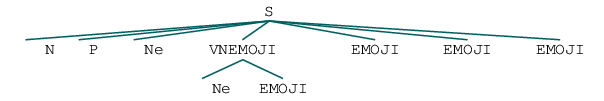

In [185]:
vasf_ext(my_tagger(comments_tokens['comment'][sent_index][0], pos_tagger))

In [186]:
my_tagger(comments_tokens['comment'][sent_index][0], pos_tagger)

[('عالیه', 'N'),
 ('به', 'P'),
 ('ترین', 'Ne'),
 ('فیلم', 'Ne'),
 ('😁', 'EMOJI'),
 ('😍', 'EMOJI'),
 ('🥰', 'EMOJI'),
 ('🥰', 'EMOJI')]

<div style="direction:rtl; font-family: 'B Lotus';  font-size:115%;">در ادامه ترکیبات قیدی، وصفی و دارای ایموجی خروجی داده شده است:</div>

In [193]:
mosufs = []
gheids = []
emojis = []
for sentence in tqdm(comments_tokens['comment']):
    tree=vasf_ext(my_tagger(sentence[0], pos_tagger))
    for subtree in tree.subtrees():
        if subtree.label() == 'NVASF':
            mosufs.append(subtree.leaves())
        if subtree.label() == 'GHEIDV':
            gheids.append(subtree.leaves())
        if subtree.label() == 'VNEMOJI':
            emojis.append(subtree.leaves())

100%|███████████████████████████████████████████████████████████████████████████| 84320/84320 [00:16<00:00, 5013.73it/s]


In [194]:
mosuf_texts = [' '.join([x[0],y[0]]) for x,y in mosufs]
gheid_texts = [' '.join([x[0],y[0]]) for x,y in gheids]
emoji_texts = [' '.join([x[0],y[0]]) for x,y in emojis]

In [197]:
results = {}
results['mosuf'] = nltk.FreqDist(mosuf_texts).most_common(50)
results['gheid'] = nltk.FreqDist(gheid_texts).most_common(50)
results['VNemoji'] = nltk.FreqDist(emoji_texts).most_common(50)
pd.DataFrame(results)

,mosuf,gheid,VNemoji
0,"(فیلم عالی, 639)","(حتما ببینید, 1832)","(بود 😍, 3520)"
1,"(فیلم قشنگی, 530)","(خیلی خوبه, 930)","(بود 👌, 3101)"
2,"(فیلم خوبی, 473)","(خیلی قشنگه, 779)","(بود ❤, 2451)"
3,"(دمتون گرم, 185)","(خیلی خندیدم, 146)","(بود 👍, 2181)"
4,"(فیلم خوب, 144)","(مگه میشه, 142)","(بود 😂, 1316)"
5,"(فیلم قشنگ, 143)","(حالا دیدم, 141)","(بود 👏, 994)"
6,"(فیلم فوق, 140)","(حتما ببینین, 136)","(بود 😘, 635)"
7,"(هیجان انگیز, 133)","(چی بگم, 98)","(بود 🤣, 544)"
8,"(فیلم زیبا, 115)","(هرچی بگم, 87)","(بود 🤩, 510)"
9,"(باب اسفنجی, 97)","(فقط میتونم, 69)","(بود 🥰, 441)"


<h2 style="direction:rtl;font-family: 'B Lotus';"> § استخراج کلمات پربسامد مبتنی بر هر فیلم</h2> 

<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">در این بخش کلمات پربسامد مرتبط با هر فیلم را به دست می‌آوریم.</div>

<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">یک پاکسازی کلی روی نام فیلم‌ها صورت گرفته است و همچنین توکن‌های کامنت‌های هر فیلم به صورت مجزا به دست آمده است:</div>

In [199]:
token_based_movie = {}
movie_names = []
for title, tokens in zip(comments_tokens['title'], comments_tokens['comment']):
    tmp_key = ''
    if len(title.split('|')) < 3:
        tmp_key = title.split('|')[0].replace(' دانلود و تماشای رایگان', '')
    else:
        tmp_key = title.split('|')[0]
    if not tmp_key in movie_names:
        movie_names.append(tmp_key)
    if tmp_key in token_based_movie:
        token_based_movie[tmp_key].extend(tokens)
    else:
        token_based_movie[tmp_key] = tokens

<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">از توکن‌های هر فیلم به صورت مجزا، stop-word ها حذف می‌شوند:</div>

In [200]:
token_based_movie_nonstop = {}
    
for k in tqdm(token_based_movie):
    for sent in token_based_movie[k]:
        for token in sent:
            if not token in stopwords:
                if k in token_based_movie_nonstop:
                    token_based_movie_nonstop[k].append(token)
                else:
                    token_based_movie_nonstop[k] = [token]

100%|█████████████████████████████████████████████████████████████████████████████| 2814/2814 [00:01<00:00, 1501.08it/s]


<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">توکن‌های پربسامد هر فیلم استخراج می‌شود:</div>

In [208]:
movie_freq = {}
for k in tqdm(token_based_movie_nonstop):
    if len(token_based_movie_nonstop[k]) > 0:
        movie_freq[k] = nltk.FreqDist(token_based_movie_nonstop[k]).most_common(30)
len(movie_freq)

100%|████████████████████████████████████████████████████████████████████████████| 2814/2814 [00:00<00:00, 16470.19it/s]


2814

In [202]:
for movie in random.sample(list(dict.fromkeys(movie_freq)), 20):
    print(f'--------[{movie}]--------')
    for k in movie_freq[movie][:5]:
        print(k)

--------[فیلم پسر ماسک]--------
('😍', 18)
('❤', 12)
('عالیه', 6)
('😂', 6)
('😉', 4)
--------[فیلم خانه هیولا]--------
('😂', 21)
('❤', 11)
('😍', 9)
('میترسیدم', 7)
('بچه', 6)
--------[فیلم مجبوریم]--------
('👌', 17)
('👏', 12)
('😔', 10)
('👍', 9)
('❤', 8)
--------[فیلم هفدهمین جشن حافظ]--------
('گلزار', 10)
('😍', 8)
('❤', 8)
('هق', 6)
('😘', 6)
--------[فیلم حس و حساسیت (Sense and Sensibility 1995)]--------
('👌', 20)
('😒', 10)
('😍', 10)
('زیبا', 8)
('👍', 8)
--------[فیلم چهار پرنسس در دنیای قصه ها]--------
('😍', 67)
('❤', 49)
('😘', 38)
('🤩', 17)
('👏', 14)
--------[فیلم تکخال]--------
('😍', 51)
('❤', 42)
('😂', 41)
('👌', 36)
('👍', 28)
--------[فیلم درساژ]--------
('❤', 10)
('👍', 8)
('😂', 6)
('😅', 4)
('😕', 4)
--------[فیلم یک جای معمولی (Nowhere Special 2020)]--------
('🥺', 9)
('👌', 7)
('❤', 7)
('قشنگ', 5)
('😢', 5)
--------[فیلم در مدت معلوم]--------
('👌', 30)
('👏', 16)
('😍', 10)
('🧐', 8)
('😐', 8)
--------[فیلم کلونیا (Colonia 2015)]--------
('😍', 22)
('👌', 22)
('واتسون', 12)
('عشقه', 8)
('وا

<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">در این قسمت با وارد کردن ایندکس فیلم درخواستی، می‌توانید، توکن‌های دارای فرکانس بالای آن را مشاهده کنید:</div>

In [222]:
m_index = int(input('Index of movie: '))
print(f'Most frequent tokens of \"{movie_names[m_index]}\" movie:')
movie_freq[movie_names[m_index]]

Index of movie: 900
Most frequent tokens of "سریال افسانه فی (Legend of Fei 2020)" movie:


[('😍', 4),
 ('قسمت', 3),
 ('❤', 2),
 ('👌', 1),
 ('جالبی', 1),
 ('واقعا', 1),
 ('آخر', 1),
 ('نگاه', 1),
 ('لطفا', 1),
 ('۳۰', 1),
 ('بزارید', 1),
 ('عاشقانه', 1)]

<h2 style="direction:rtl;font-family: 'B Lotus';"> § استخراج کلمات کلیدی</h2> 

In [203]:
import yake

<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">در این قسمت کلمات کلیدی کلیه کامنت‌ها را استخراج می‌کنیم:</div>

In [204]:
text = ' '.join(tokens_nonstop)

In [205]:
kw_extractor = yake.KeywordExtractor(top=30)
keywords = kw_extractor.extract_keywords(text)

for kw in keywords:
    print(kw)

('واقعا واقعا واقعا', 2.998255823334252e-06)
('حتما حتما حتما', 3.0605418992151834e-06)
('واقعا قشنگ حتما', 3.5416438876260918e-06)
('خوبه خوبه خوبه', 3.700188415643092e-06)
('واقعا قشنگ', 4.651405536791002e-06)
('قشنگ', 6.238327919842091e-06)
('واقعا', 6.487844019070721e-06)
('واقعا عالیه', 8.580803042518341e-06)
('عالیه عالیه عالیه', 8.933340721240143e-06)
('واقعا ارزش دیدن', 9.384813565600056e-06)
('پیشنهاد حتما حتما', 9.6094859887419e-06)
('حتما حتما', 1.110256197168596e-05)
('دیدم واقعا عالیه', 1.1696565017746858e-05)
('قشنگ واقعا', 1.1790772174656263e-05)
('واقعا عالیه حتما', 1.2160450329023478e-05)
('عالیه', 1.2342603817577074e-05)
('قشنگ پیشنهاد حتما', 1.2695969163898592e-05)
('حتما', 1.3847557258095267e-05)
('قشنگ حتما', 1.5272431522241258e-05)
('قشنگ حتما العاده', 1.579251291392597e-05)
('عالیه حتما', 1.5848566788190107e-05)
('عالیه عالیه', 1.5946064136552554e-05)
('عالیه پیشنهاد حتما', 1.633487192020708e-05)
('پیشنهاد حتما', 1.732887862597579e-05)
('واقعا عالیه عالیه', 1.783

<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">در این بخش کلمات کلیدی مربوط به هر فیلم را استخراج می کنیم:</div>

In [206]:
keyword_based_movie = {}
for k in tqdm(token_based_movie_nonstop):
    text = ' '.join(token_based_movie_nonstop[k])
    kw_extractor = yake.KeywordExtractor(top=30)
    keywords = kw_extractor.extract_keywords(text)
    keyword_based_movie[k] = keywords

100%|███████████████████████████████████████████████████████████████████████████████| 2814/2814 [01:20<00:00, 35.13it/s]


In [207]:
for movie in random.sample(list(dict.fromkeys(keyword_based_movie)), 20):
    print(f'--------[{movie}]--------')
    for k in keyword_based_movie[movie][:5]:
        print(k)

--------[فیلم شیطان اسم دارد (The Devil Has a Name 2019)]--------
('العاده دوست', 0.00470688094720815)
('جالب', 0.04491197687864554)
('العاده', 0.06844581806138879)
('دوست', 0.06844581806138879)
--------[فیلم جادوی وارونه]--------
('دوست جادو یاد', 1.566069554272025e-06)
('جادو یاد بگیرم', 2.2900613057523635e-06)
('پیشنهاد حتما قشنگ', 6.8334723254770025e-06)
('منم دوست جادو', 6.932367949758083e-06)
('پیشنهاد حتما حتما', 7.447784399065546e-06)
--------[فیلم لاک پشت های نینجا : خارج از سایه ها]--------
('حتما مایکرو دوست', 0.0005357717418795655)
('خوبه سانسور میکنین', 0.0005360418503470785)
('دمتون گرم سازنده', 0.0005578717437827028)
('شکل لاک بشت', 0.0007145981962995847)
('لاک بشت زشته', 0.0007145981962995847)
--------[سریال وی تی سی (VTC 2021)]--------
('گلشیفته عالیه', 0.009239332327148086)
('گلشیفته', 0.09568045026443411)
('عالیه', 0.09568045026443411)
--------[فیلم تیمارستان گونجیام (Gonjiam: Haunted Asylum 2018)]--------
('دلم براشون سوخت', 0.0007328238859625009)
('خوف الان دقیقا',

<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">در این قسمت با وارد کردن ایندکس فیلم درخواستی، می‌توانید، کلمات کلیدی کامنت‌های آن را مشاهده کنید:</div>

In [224]:
m_index = int(input('Index of movie: '))
print(f'Most frequent tokens of \"{movie_names[m_index]}\" movie:')
keyword_based_movie[movie_names[m_index]]

Index of movie: 900
Most frequent tokens of "سریال افسانه فی (Legend of Fei 2020)" movie:


[('آخر نگاه لطفا', 0.0018925610702159267),
 ('واقعا قسمت آخر', 0.002094094889437704),
 ('نگاه لطفا قسمت', 0.0029305333267352156),
 ('قسمت آخر نگاه', 0.0029305333267352165),
 ('لطفا قسمت قسمت', 0.0045539707050142875),
 ('بزارید عاشقانه', 0.007802244967659386),
 ('آخر نگاه', 0.015103835216116659),
 ('نگاه لطفا', 0.015103835216116659),
 ('واقعا قسمت', 0.01665360812154712),
 ('قسمت آخر', 0.02323687776735916),
 ('لطفا قسمت', 0.02323687776735916),
 ('قسمت قسمت', 0.035904264103634544),
 ('جالبی', 0.05815421818951193),
 ('قسمت', 0.06205716761226819),
 ('واقعا', 0.08798773338320563),
 ('بزارید', 0.08798773338320563),
 ('عاشقانه', 0.08798773338320563),
 ('آخر', 0.12197993148826404),
 ('نگاه', 0.12197993148826404),
 ('لطفا', 0.12197993148826404)]

<h2 style="direction:rtl;font-family: 'B Lotus';"> § تحلیل احساسات نسبت به هر فیلم</h2> 

<div style="direction: rtl; font-family: 'B Lotus'; font-size: 115%;">با استفاده از مدل <code>mt5-small</code> که بر روی داده های فارسی <code>fine-tune</code> شده است، (مدل مورد استفاده در این <a href="https://huggingface.co/persiannlp/mt5-small-parsinlu-sentiment-analysis" rel="noopener noreferrer" target="_blank">لینک</a> قابل دسترس است.) داده های کامنت ها را به ازای هر کامنت به مدل ورودی داده و خروجی آن را در یک ستون جدید داده ذخیره کردیم و در نهایت برای هر کدام از فیلم ها یک میزان محبوبیت ارائه می کنیم که یک عدد بین 0 تا 5 می باشد؛ 5 به معنی محبوبیت بسیاربالا و 0 به معنی محبوبیت بسیار پایین می باشد. همین کار برای ژانرهای مختلف نیز انجام شده است و امتیاز دهی انجام شده که چه ژانری محبوبیت بیشتری بین مخاطبین دارد. (این نکته حائز اهمیت است که کامنت های فیلم های غمگین یا ناراحت کننده ممکن است توسط این مدل منفی به نظر برسد.)</div>

In [ ]:
!pip install transformers
!pip install sentencepiece
!pip install torch torchvision torchaudio

In [44]:
import torch
from transformers import AutoTokenizer, MT5EncoderModel, MT5Tokenizer, MT5ForConditionalGeneration

In [45]:
model_name = "persiannlp/mt5-small-parsinlu-sentiment-analysis"

In [47]:
# model_encoding = MT5EncoderModel.from_pretrained(model_name)
model_generator = MT5ForConditionalGeneration.from_pretrained(model_name)
tokenizer = MT5Tokenizer.from_pretrained(model_name)

<div style="direction: rtl; font-family: 'B Lotus'; font-size: 115%;">به ازای هر کامنت برای فیلم ها یک تحیلی احساست به دست می‌آید و آن را خروجی می‌دهد:</div>

In [88]:
def extract_sentiment(start, end, sentences):
    comment_sentiment_data = []
    # comment_sentiment_hidden_state = []
    for sents in tqdm(sentences[start:end]):
        sent = ' '.join(sents)
        input_ids = tokenizer(sent, return_tensors="pt").input_ids
        # output = model_encoding(input_ids)
        # comment_sentiment_hidden_state.append(output.last_hidden_state)
        res = model_generator.generate(input_ids)
        comment_sentiment_data.append(tokenizer.batch_decode(res, skip_special_tokens=True))
    return comment_sentiment_data

<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">کامنت‌ها به صورت مجموعه ای از جملات به تابع <code>extract_sentiment</code> داده می‌شود و همچنین بازه ای که در آن باید بررسی را انجام دهد.</div>
<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;"><blockquote>دلیل این که یک بازه به عنوان ورودی داده می‌شود این است که به با توجه به زمان بر بودن استخراج احساسات به کمک مدل mt5-small، نمی توان در یک روند پیوسته عملیات را انجام داد.</blockquote></div>
<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">خروجی‌های مدل نیز در فایل <code>result/sentiment.txt/../.</code> ذخیره می‌شود. (هر خط این فایل معادل یک کامنت می‌باشد.)</div>

In [73]:
interval = [80000, len(comments_sentences['comment'])]
sentiment = extract_sentiment(start=interval[0],
                              end=interval[1],
                              sentences=comments_sentences['comment'])

f = open('./../result/sentiment.txt', 'a')
for s in sentiment:
    for i in range(len(s)):
        tmp = s[i][0]
        tmp = '-'.join(tmp.split())
        if i < len(s)-1:
            f.write(f'{tmp}\t')
        else:
            f.write(f'{tmp}')
    f.write('\n')
f.close()

f = open('./../result/sentiment.txt', 'r')
num = len(f.readlines())
f.close()

print(f'# Done until {num}, Must be {interval[1]}')

100%|███████████████████████████████████████████████████████████████████████████████| 4320/4320 [08:46<00:00,  8.21it/s]

# Done until 84320, Must be 84320


In [49]:
f = open('./../result/sentiment.txt', 'r')
lines = f.readlines()
f.close()
lines = [x.replace('\n', '') for x in lines]

<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">خروجی‌های مدل مورد استفاده یکی از شش حالت زیر است، یک معادل عددی برای امتیاز دهی در نظر می‌گیریم:</div>

In [50]:
sentiment_label = {'very-negative': -2,
                   'negative': -1,
                   'no-sentiment-expressed': 0,
                   'mixed': 0,
                   'positive': 1,
                   'very-positive': 2}

<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">یک دیتافریم می‌سازیم که شامل نام فیلم، ژانر، تحلیل احساسات خروجی کامنت مربوطه و امتیاز متناسب با تحلیل احساسات، ستون‌های آن باشند:</div>

In [51]:
comment_sentiment = {}
comment_sentiment['genre'] = comments_sentences['genre']
comment_sentiment['title'] = []
comment_sentiment['sentiment-label'] = []
comment_sentiment['sentiment-score'] = []

for line in lines:
    comment_sentiment['sentiment-label'].append(line)
    comment_sentiment['sentiment-score'].append(sentiment_label[line])

<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">یک پاکسازی کلی روی اسامی فیلم‌ها انجام می‌شود:</div>

In [52]:
for title in comments_sentences['title']:
    tmp = title.split('|')
    if len(tmp) == 3:
        comment_sentiment['title'].append(tmp[0])
    else:
        tmp[0] = tmp[0].replace(' دانلود و تماشای رایگان', '')
        comment_sentiment['title'].append(tmp[0])

In [53]:
comment_sentiment_df = pd.DataFrame(comment_sentiment)
comment_sentiment_df

,genre,title,sentiment-label,sentiment-score
0,drama,فیلم قدغن,very-positive,2
1,drama,فیلم قدغن,positive,1
2,drama,فیلم قدغن,positive,1
3,drama,فیلم قدغن,very-positive,2
4,drama,فیلم قدغن,very-positive,2
...,...,...,...,...
84315,theatre,فیلم در انتظار آدولف,very-positive,2
84316,theatre,فیلم در انتظار آدولف,very-positive,2
84317,theatre,فیلم در انتظار آدولف,very-positive,2
84318,theatre,فیلم شهر بدون آسمان,very-positive,2


<h3 style="direction:rtl;font-family: 'B Lotus';"> § تحلیل محبوبیت ژانرها</h3>

<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">یک تابع امتیاز دهی پله ای تعریف می‌کنیم که براساس تعداد افراد ای که رای داده اند، هرچه تعداد کمتر باشد ضریب کمتری را در امتیاز آن ضرب می‌کند و در نهایت یک نرمال سازی انجام می دهد که اعداد خروجی بین 0 , 1 شود:</div>

In [79]:
def my_score_genre(num, score):
    c = 1
    if num <= 300:
        c = 1
    elif num <= 1000:
        c = 5
    elif num <= 3000:
        c = 8
    elif num <= 7000:
        c = 10
    else:
        c = 11
    return (c*score)/(11*5)

<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">یک دیتافریم با ستون‌های ژانر، تعداد رای، میانگین امتیاز و امتیازدهی جدید می‌سازیم:</div>

In [80]:
genre_score = {}
for i, genre in enumerate(comment_sentiment['genre']):
    if genre in genre_score:
        genre_score[genre]['num'] += 1
        genre_score[genre]['sum'] += comment_sentiment['sentiment-score'][i]
        genre_score[genre]['avg'] = genre_score[genre]['sum']/genre_score[genre]['num']
    else:
        genre_score[genre] = {'num': 1, 'sum': comment_sentiment['sentiment-score'][i], 'avg': 0}

<div style="direction:rtl; font-family: 'B Lotus';  font-size:115%;">مرتب سازی براساس تابع امتیازدهی my_score_genre انجام شده است:</div>

In [81]:
genre_score_df = {}
genre_score_df['genre'] = []
genre_score_df['num'] = []
genre_score_df['avg'] = []

for k in genre_score:
    genre_score_df['genre'].append(k)
    genre_score_df['num'].append(genre_score[k]['num'])
    genre_score_df['avg'].append(genre_score[k]['avg']+2)

genre_score_df['my_score'] = [my_score_genre(n, s) for n, s in zip(genre_score_df['num'], genre_score_df['avg'])]
genre_score_df = pd.DataFrame(genre_score_df)
genre_score_df = genre_score_df.sort_values(by=['my_score'], ascending=False)
genre_score_df = genre_score_df.reset_index(drop=True)
genre_score_df = genre_score_df[genre_score_df['my_score'] > 0]
genre_score_df

,title,num,avg,my_score
0,adventure,14601,3.556263,0.711253
1,comedy,13424,3.438766,0.687753
2,action,13483,3.412445,0.682489
3,family,8754,3.332648,0.666530
4,drama,12418,3.311161,0.662232
5,romance,3035,3.431960,0.623993
6,crime,3661,3.298279,0.599687
7,fantasy,1497,3.316633,0.482419
8,short,1564,3.111893,0.452639
9,thriller,1615,2.997523,0.436003


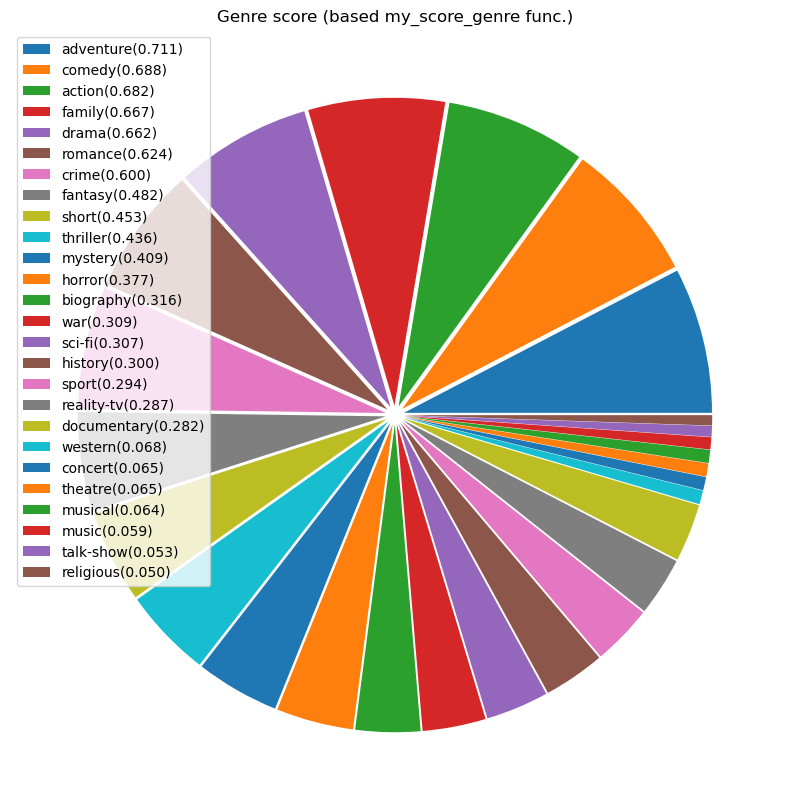

In [82]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 10)

y = np.array(genre_score_df['my_score'])
mylabels = [f"{l}({genre_score_df['my_score'][i]:.3f})" for i, l in enumerate(genre_score_df['title'])]
myexplode = [0.03 for _ in range(len(mylabels))]

plt.pie(y, explode=myexplode)
plt.title('Genre score (based my_score_genre func.)')
plt.legend(labels=mylabels)
plt.show() 

<div style="direction:rtl;font-family: 'B Lotus'; font-size:125%;"><b>نتیجه‌گیری:</b></div>
<br>
<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">با توجه به خروجی‌های دو سلول قبلی، می توان نتیجه گرفت که ۵ مورد از محبوب‌ترین ژانرهای فیلم و سریال، به ترتیب <b>ماجراجویی، کمدی، اکشن، خانوادگی و درام</b> می‌باشد.<div>
<hr>

<h3 style="direction:rtl;font-family: 'B Lotus';"> § تحلیل محبوبیت فیلم و سریال</h3>

<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">یک دیتافریم با ستون‌های ژانر، تعداد رای، میانگین امتیاز و امتیازدهی جدید می‌سازیم:</div>

In [ ]:
def my_score_movie(num, score):
    c = 1
    if num <= 10:
        c = 1
    elif num <= 40:
        c = 5
    elif num <= 160:
        c = 8
    elif num <= 640:
        c = 10
    else:
        c = 11
    return (c*score)/(11*5)

In [83]:
movie_score = {}
for i, title in enumerate(comment_sentiment['title']):
    if title in movie_score:
        movie_score[title]['num'] += 1
        movie_score[title]['sum'] += comment_sentiment['sentiment-score'][i]
        movie_score[title]['avg'] = movie_score[title]['sum']/movie_score[title]['num']
    else:
        movie_score[title] = {'num': 1, 'sum': comment_sentiment['sentiment-score'][i], 'avg': 0}

<div style="direction:rtl; font-family: 'B Lotus';  font-size:115%;">مرتب سازی براساس تابع امتیازدهی my_score_movie انجام شده است:</div>

In [84]:
movie_score_df = {}
movie_score_df['movie'] = []
movie_score_df['num'] = []
movie_score_df['score'] = []

for movie in movie_score:
    movie_score_df['movie'].append(movie)
    movie_score_df['num'].append(movie_score[movie]['num'])
    movie_score_df['score'].append(movie_score[movie]['avg']+2)

movie_score_df['my_score'] = [my_score(n, s) for n, s in zip(movie_score_df['num'], movie_score_df['score'])]
movie_score_df = pd.DataFrame(movie_score_df)
movie_score_df = movie_score_df.sort_values(by=['my_score'], ascending=False)
movie_score_df = movie_score_df.reset_index(drop=True)
movie_score_df = movie_score_df[movie_score_df['my_score'] > 0]
movie_score_df

,movie,num,score,my_score
0,فیلم کروئلا,1175,3.574468,0.714894
1,فیلم خوب، بد، جلف 2: ارتش سری,1082,3.471349,0.694270
2,فیلم تور جهانی ترول ها,206,3.844660,0.692039
3,فیلم تورنا2,198,3.797980,0.683636
4,فیلم موآنا,181,3.795580,0.683204
...,...,...,...,...
2798,سریال ترانه های خاله نسرین,2,0.500000,0.050000
2799,فیلم من هستم (ایدز),4,0.500000,0.050000
2800,فیلم طوفان اژدها,2,0.500000,0.050000
2801,فیلم داستان دو خواهر,2,0.500000,0.050000


<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">پنجاه فیلم برتر براساس معیار امتیازدهی تعریف شده:</div>

In [92]:
movie_score_df[:50]

,movie,num,score,my_score
0,فیلم کروئلا,1175,3.574468,0.714894
1,فیلم خوب، بد، جلف 2: ارتش سری,1082,3.471349,0.694270
2,فیلم تور جهانی ترول ها,206,3.844660,0.692039
3,فیلم تورنا2,198,3.797980,0.683636
4,فیلم موآنا,181,3.795580,0.683204
5,فیلم شانس (Luck 2022),185,3.772973,0.679135
6,فیلم عروسک های زشت,172,3.761628,0.677093
7,فیلم سکسکه,562,3.759786,0.676762
8,فیلم سگ مورد علاقه ملکه (The Queens Corgi 2019),203,3.758621,0.676552
9,فیلم چگونه اژدهای خود را تربیت کنیم 3,186,3.758065,0.676452


---------